In [2]:
# Import all the tools we need

# Regular EDA(Exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#We want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve,plot_roc_curve

#Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

#Pandas-Profiling helps to build a widget that can be used to better visualise it
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
 
%matplotlib inline

### Importing the dataset

In [3]:
df=pd.read_csv('../Datasets/Liver_dataset.csv')

### Shape of the dataset (Rows, Columns)

In [4]:
df.shape

(583, 11)

### Head of the dataset

In [5]:
df.head()

Age  sex  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65    1              0.7               0.1                   187   
1   62    1             10.9               5.5                   699   
2   62    0              7.3               4.1                   490   
3   58    1              1.0               0.4                   182   
4   72    0              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1

<br><br>
# Exploratory Data analysis
<br>

### Renaming columns

In [7]:
df.rename(columns ={'Dataset':'Result'}, inplace = True)

In [8]:
# View of the Renamed Dataframe
df.head()

Age  Sex  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65    1              0.7               0.1                   187   
1   62    1             10.9               5.5                   699   
2   62    0              7.3               4.1                   490   
3   58    1              1.0               0.4                   182   
4   72    0              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Result  
0      3.3                        0.90       1  
1      3.2                        0.74       1  
2      3.3                        0.89       1  
3      3.4                        1.00       1  
4      2.4                        0.40       1

### Information about the data

In [8]:
df=df1

In [54]:
list(df.columns.values)

['Age',
 'Sex',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio',
 'Result']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      303 non-null    int64
 1   Sex                      303 non-null    int64
 2   Chest_pain               303 non-null    int64
 3   Resting_blood_pressure   303 non-null    int64
 4   Cholesterol              303 non-null    int64
 5   Fasting_blood_sugar      303 non-null    int64
 6   ECG_results              303 non-null    int64
 7   Maximum_heart_rate       303 non-null    int64
 8   Exercise_induced_angina  303 non-null    int64
 9   ST_depression            303 non-null    int32
 10  ST_slope                 303 non-null    int64
 11  Major_vessels            303 non-null    int64
 12  Thalassemia_types        303 non-null    int64
 13  Heart_disease            303 non-null    int64
dtypes: int32(1), int64(13)
memory usage: 32.1 KB


### Description about the dataset

In [11]:
df.describe()

Age         Sex  Chest_pain  Resting_blood_pressure  \
count  303.000000  303.000000  303.000000              303.000000   
mean    54.366337    0.683168    0.966997              131.623762   
std      9.082101    0.466011    1.032052               17.538143   
min     29.000000    0.000000    0.000000               94.000000   
25%     47.500000    0.000000    0.000000              120.000000   
50%     55.000000    1.000000    1.000000              130.000000   
75%     61.000000    1.000000    2.000000              140.000000   
max     77.000000    1.000000    3.000000              200.000000   

       Cholesterol  Fasting_blood_sugar  ECG_results  Maximum_heart_rate  \
count   303.000000           303.000000   303.000000          303.000000   
mean    246.264026             0.148515     0.528053          149.646865   
std      51.830751             0.356198     0.525860           22.905161   
min     126.000000             0.000000     0.000000           71.000000   
25%     211.000000             0.000000     0.000000          133.500000   
50%     240.000000             0.000000     1.000000          153.000000   
75%     274.500000             0.000000     1.000000          166.000000   
max     564.000000             1.000000     2.000000          202.000000   

       Exercise_induced_angina  ST_depression    ST_slope  Major_vessels  \
count               303.000000     303.000000  303.000000     303.000000   
mean                  0.326733       0.765677    1.399340       0.729373   
std                   0.469794       1.070933    0.616226       1.022606   
min                   0.000000       0.000000    0.000000       0.000000   
25%                   0.000000       0.000000    1.000000       0.000000   
50%                   0.000000       0.000000    1.000000       0.000000   
75%                   1.000000       1.000000    2.000000       1.000000   
max                   1.000000       6.000000    2.000000       4.000000   

       Thalassemia_types  Heart_disease  
count         303.000000     303.000000  
mean            2.313531       0.544554  
std             0.612277       0.498835  
min             0.000000       0.000000  
25%             2.000000       0.000000  
50%             2.000000       1.000000  
75%             3.000000       1.000000  
max             3.000000       1.000000

### Are there any missing values?

In [22]:
df.isna().sum() 

Age                           0
Sex                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Result                        0
dtype: int64

In [23]:
df=df.dropna()

### Correlation matrix & Matrix Visualisation

In [13]:
df.corr()

Age       Sex  Chest_pain  \
Age                      1.000000 -0.098447   -0.068653   
Sex                     -0.098447  1.000000   -0.049353   
Chest_pain              -0.068653 -0.049353    1.000000   
Resting_blood_pressure   0.279351 -0.056769    0.047608   
Cholesterol              0.213678 -0.197912   -0.076904   
Fasting_blood_sugar      0.121308  0.045032    0.094444   
ECG_results             -0.116211 -0.058196    0.044421   
Maximum_heart_rate      -0.398522 -0.044020    0.295762   
Exercise_induced_angina  0.096801  0.141664   -0.394280   
ST_depression            0.178396  0.089604   -0.180783   
ST_slope                -0.168814 -0.030711    0.119717   
Major_vessels            0.276326  0.118261   -0.181053   
Thalassemia_types        0.068001  0.210041   -0.161736   
Heart_disease           -0.225439 -0.280937    0.433798   

                         Resting_blood_pressure  Cholesterol  \
Age                                    0.279351     0.213678   
Sex                                   -0.056769    -0.197912   
Chest_pain                             0.047608    -0.076904   
Resting_blood_pressure                 1.000000     0.123174   
Cholesterol                            0.123174     1.000000   
Fasting_blood_sugar                    0.177531     0.013294   
ECG_results                           -0.114103    -0.151040   
Maximum_heart_rate                    -0.046698    -0.009940   
Exercise_induced_angina                0.067616     0.067023   
ST_depression                          0.190276     0.035479   
ST_slope                              -0.121475    -0.004038   
Major_vessels                          0.101389     0.070511   
Thalassemia_types                      0.062210     0.098803   
Heart_disease                         -0.144931    -0.085239   

                         Fasting_blood_sugar  ECG_results  Maximum_heart_rate  \
Age                                 0.121308    -0.116211           -0.398522   
Sex                                 0.045032    -0.058196           -0.044020   
Chest_pain                          0.094444     0.044421            0.295762   
Resting_blood_pressure              0.177531    -0.114103           -0.046698   
Cholesterol                         0.013294    -0.151040           -0.009940   
Fasting_blood_sugar                 1.000000    -0.084189           -0.008567   
ECG_results                        -0.084189     1.000000            0.044123   
Maximum_heart_rate                 -0.008567     0.044123            1.000000   
Exercise_induced_angina             0.025665    -0.070733           -0.378812   
ST_depression                       0.022088    -0.055906           -0.327627   
ST_slope                           -0.059894     0.093045            0.386784   
Major_vessels                       0.137979    -0.072042           -0.213177   
Thalassemia_types                  -0.032019    -0.011981           -0.096439   
Heart_disease                      -0.028046     0.137230            0.421741   

                         Exercise_induced_angina  ST_depression  ST_slope  \
Age                                     0.096801       0.178396 -0.168814   
Sex                                     0.141664       0.089604 -0.030711   
Chest_pain                             -0.394280      -0.180783  0.119717   
Resting_blood_pressure                  0.067616       0.190276 -0.121475   
Cholesterol                             0.067023       0.035479 -0.004038   
Fasting_blood_sugar                     0.025665       0.022088 -0.059894   
ECG_results                            -0.070733      -0.055906  0.093045   
Maximum_heart_rate                     -0.378812      -0.327627  0.386784   
Exercise_induced_angina                 1.000000       0.271144 -0.257748   
ST_depression                           0.271144       1.000000 -0.555175   
ST_slope                               -0.257748      -0.555175  1.000000   
Major_vessels                           0.1

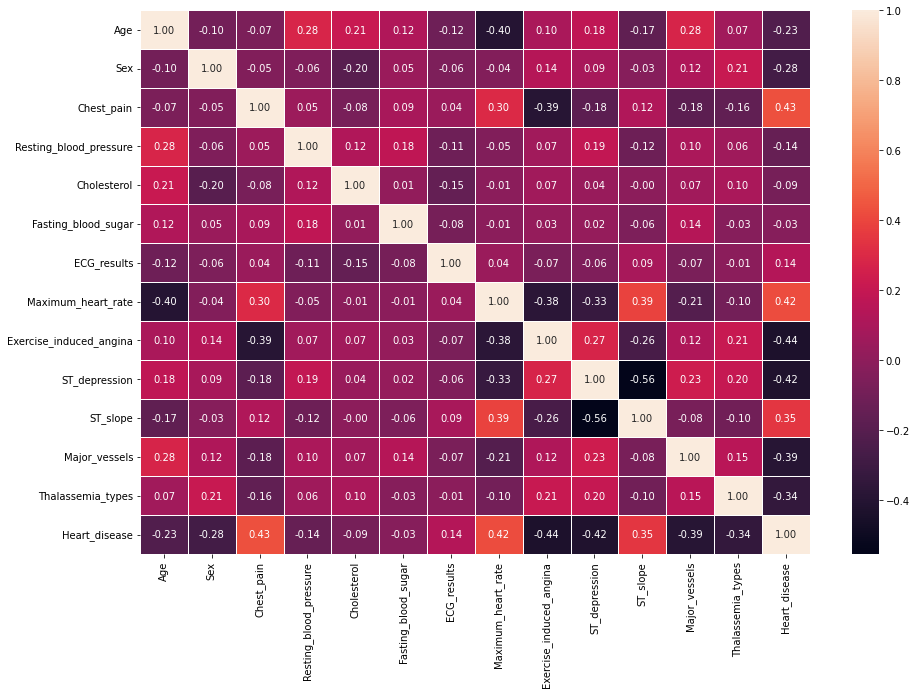

In [14]:
# Let's make our correlation matrix visual
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [13]:
df.head()

#We will be taking independent variables to predict dependent variables

Age  Sex  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65    1              0.7               0.1                   187   
1   62    1             10.9               5.5                   699   
2   62    0              7.3               4.1                   490   
3   58    1              1.0               0.4                   182   
4   72    0              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Result  
0      3.3                        0.90       1  
1      3.2                        0.74       1  
2      3.3                        0.89       1  
3      3.4                        1.00       1  
4      2.4                        0.40       1

### Split data using Train-Test Split

In [24]:
X=df.drop('Result',axis=1)
y=df['Result']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

<br>
Now we have got our data split into training and test sets, it is time to build a Machine Learning model.

We will train it (find the patterns) on the training set.

And we will test it (use the patterns) on the test set.

**We're going to try 3 different Machine Learning models:**
1. Logistic Regression

2. K-Nearest Neighbours Classifier

3. Random Forest Classifier

## 1. Logistic Regression

In [25]:
lr=LogisticRegression()

In [26]:
lr.fit(X_train,y_train)

LogisticRegression()

In [27]:
#Training score

lr.score(X_train,y_train)

0.7451403887688985

In [28]:
#Prediction of the test variable

lr_y_preds=lr.predict(X_test)

In [29]:
#Testing accuracy

lr.score(X_test,y_test)

0.6293103448275862

### Confusion Matrix

In [30]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")


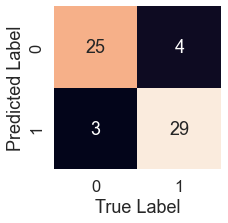

In [49]:
plot_conf_mat(y_test,lr_y_preds)

### Classification Report

In [50]:
print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## 2. K-Nearest Neighbour

In [31]:
knn=KNeighborsClassifier()

In [32]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [33]:
#Training score

knn.score(X_train,y_train)

0.7883369330453563

In [34]:
#Prediction of the test variable

knn_y_preds=knn.predict(X_test)

In [35]:
#Testing accuracy

knn.score(X_test,y_test)

0.6206896551724138

### Confusion Matrix

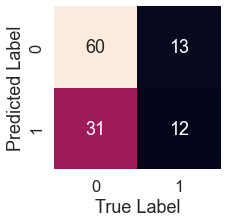

In [36]:
plot_conf_mat(y_test,knn_y_preds)

### Classification Report

In [37]:
print(classification_report(y_test,knn_y_preds))

              precision    recall  f1-score   support

           1       0.66      0.82      0.73        73
           2       0.48      0.28      0.35        43

    accuracy                           0.62       116
   macro avg       0.57      0.55      0.54       116
weighted avg       0.59      0.62      0.59       116



## 3. Random Forest

In [38]:
rf=RandomForestClassifier()

In [39]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
#Training score

rf.score(X_train,y_train)

1.0

In [41]:
#Prediction of the test variable

rf_y_preds=rf.predict(X_test)

In [42]:
#Testing accuracy

rf.score(X_test,y_test)

0.6551724137931034

### Confusion Matrix

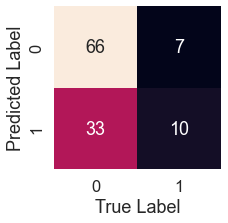

In [43]:
plot_conf_mat(y_test,rf_y_preds)

### Classification Report

In [44]:
print(classification_report(y_test,rf_y_preds))

              precision    recall  f1-score   support

           1       0.67      0.90      0.77        73
           2       0.59      0.23      0.33        43

    accuracy                           0.66       116
   macro avg       0.63      0.57      0.55       116
weighted avg       0.64      0.66      0.61       116



In [45]:
svm = SVC()

In [46]:
svm.fit(X_train,y_train)

SVC()

In [47]:
svm.score(X_train,y_train)

0.7365010799136069

In [48]:
preds=svm.predict(X_test)
svm.score(X_test,y_test)

0.6293103448275862

<br><br>
### Different Model Scores (accuracy)

In [49]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN':knn.score(X_test,y_test),
             'Random Forest':rf.score(X_test,y_test),
             'svm':svm.score(X_test,y_test)}

In [50]:
model_scores

{'Logistic Regression': 0.6293103448275862,
 'KNN': 0.6206896551724138,
 'Random Forest': 0.6551724137931034,
 'svm': 0.6293103448275862}

## Model Comparison

In [51]:
#Based on accuracy
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

Logistic Regression      KNN  Random Forest      svm
accuracy              0.62931  0.62069       0.655172  0.62931

In [53]:
from joblib import Parallel, delayed
import joblib
joblib.dump(rf, 'liver.sav')

['liver.sav']

<AxesSubplot:>

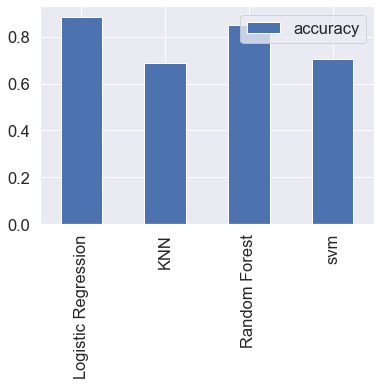

In [73]:
model_compare.T.plot(kind='bar') # (T is here for transpose)